# Modelos Multiplos Preditivos - Cap. 8
## 0 - Bibliotecas importadas

In [168]:
import pandas as pd
import numpy as np

## 1 - Carregando dataset 'Wine Quality'
* Dados numéricos;
* Não houve necessidade de fazer tratamento quanto a falta ou inconsistência nos dados;
* 11 características e target sendo sobre a qualidade do vinho (0-qualidade ruim- até 10-Excelente qualidade-);
* Não está balanceado (há mais vinhos normais do que excelentes ou ruins);






|nº| Atributo            | SI | Observação |
|---|---------------------|----|------------|
|01.| __Acidez fixa:__ | (g/dm³)| Formado pela acidez orgânica da uva (tartático) e da fermentação alcoólica.| 
|02.| __Acidez volátil:__ | (g/dm³) | Produzidos pelas reações químicas durante a maturação do vinho (Ácido Acético). A acidez volátil é um indicador da qualidade do vinho.| 
|03.| __Ácido cítrico:__ | (g/dm³) | Um dos ácidos orgânicos da uva.| 
|04.| __Açúcar residual:__ | (g/dm³)  | - | 
|05.| __Cloretos:__ | (g/dm³) | Cloreto de sódio | 
|06.| __Dióxido de enxofre livre:__  | (mg/dm³) | - | 
|07.| __Dióxido de enxofre total:__  | (mg/dm³) | - | 
|08.| __Densidade:__  | (g/cm³) | - | 
|09.| __pH:__ | [0,14] | - | 
|10.| __Sulfatos:__ | (g/dm³) | Sulfato de potássio | 
|11.| __Álcool:__ | - | - | 
|12.| __Qualidade:__ | (vol.%) | - |







### Vinho Branco

In [169]:
df_white = pd.read_csv('./winequality-white.csv', sep = ';')
print("Quantidade amostra = ",df_white['quality'].count())
df_white.head(n=1)


Quantidade amostra =  4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6


In [170]:
pd.options.display.float_format = "{:.2f}".format
df_white.describe(percentiles=[])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


Text(0, 0.5, 'Frequência')

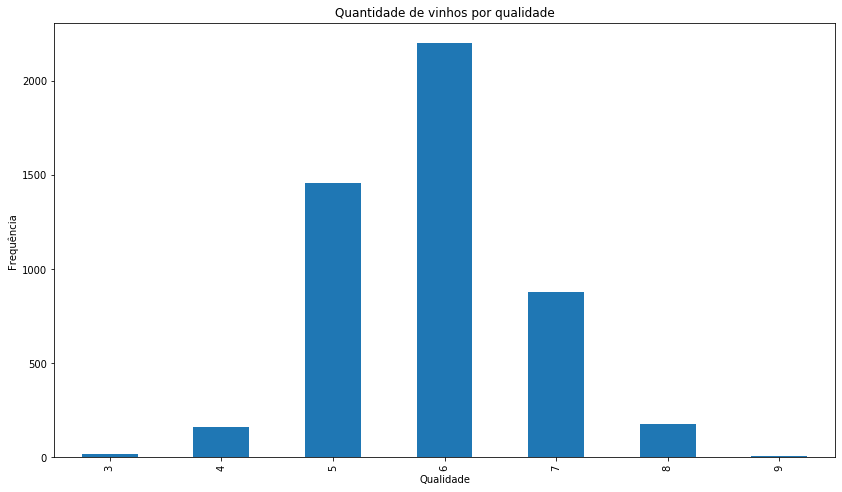

In [171]:
ax = df_white['quality'].value_counts().sort_index().plot.bar(
                                    y = [1,2,3,4,5,6,7,8,9,10,11],
                                    figsize=(14,8),
                                    title="Quantidade de vinhos por qualidade"
                                    )
ax.set_xlabel("Qualidade")
ax.set_ylabel("Frequência")

## 2 - Pré-Processamento

In [172]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

### Agrupando Classes - 2 Classes

In [173]:
classes_2 = []
for i in df_white['quality']:
    if i >= 0 and i <= 5:
        classes_2.append('1')
    elif i >= 6 and i <= 10:
        classes_2.append('2')
df_white['classes_2'] = classes_2  

### Agrupando Classes - 3 Classes

In [174]:
classes_3 = []
for i in df_white['quality']:
    if i >= 0 and i <= 3:
        classes_3.append('1')
    elif i >= 4 and i <= 6:
        classes_3.append('2')
    elif i >= 7 and i <= 10:
        classes_3.append('3')
df_white['classes_3'] = classes_3  
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classes_2,classes_3
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6,2,2
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6,2,2
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6,2,2
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,2,2
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,6,2,2
4894,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,5,1,2
4895,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,6,2,2
4896,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,7,2,3


### StandardScale
> class sklearn.preprocessing.StandardScaler(**copy**=True, **with_mean**=True, **with_std**=True)

In [175]:
# X = df_white.iloc[:,:11]
# y = df_white['quality']
# ss = StandardScaler()
# X = ss.fit_transform(X)
# X


array([[-0.21894148],
       [-0.39908096],
       [-0.39667196],
       ...,
       [-0.24570812],
       [-0.35277467],
       [-0.35277467]])

## 3 - Treinamento

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
# Normalmente, em python, o X tem relação com o dataframe gerado e o 'y' com os valores em target
X = df_white.iloc[:,:11]
y = df_white['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=1)

### Bagging
>class sklearn.ensemble.BaggingClassifier(**base_estimator**=None, **n_estimators**=10, **max_samples**=1.0, **max_features**=1.0, **bootstrap**=True, **bootstrap_features**=False, **oob_score**=False, **warm_start**=False, **n_jobs**=None, **random_state**=None, **verbose**=0)

In [178]:
from sklearn.ensemble import BaggingClassifier
k_range = [10,20,30,40,50,60,70,80,90, 100]
bc_list_predict = []
for k in k_range:
        
    bc = BaggingClassifier( n_estimators = k,
                            random_state = 1
                          )
    bc.fit(X_train,y_train)
    bc_list_predict.append(bc.predict(X_test))

### Decision Tree
> class sklearn.tree.DecisionTreeClassifier(**criterion**='gini', **splitter**='best', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, **min_weight_fraction_leaf**=0.0, **max_features**=None, **random_state**=None, **max_leaf_nodes**=None, **min_impurity_decrease**=0.0, **min_impurity_split**=None, **class_weight**=None, **presort**='deprecated', **ccp_alpha**=0.0)

In [179]:
from sklearn.tree import DecisionTreeClassifier
k_range = [None,2,3,4,5,6,7,8,9,10]
dtc_list_predict = []
for k in k_range :
    dtc = DecisionTreeClassifier(max_depth = k,
                                random_state = 1 )
    dtc.fit(X_train,y_train)
    dtc_list_predict.append(dtc.predict(X_test))

### Random Forest
> class sklearn.ensemble.RandomForestClassifier(**n_estimators**=100, **criterion**='gini', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, **min_weight_fraction_leaf**=0.0, **max_features**='auto', **max_leaf_nodes**=None, **min_impurity_decrease**=0.0, **min_impurity_split**=None, **bootstrap**=True, **oob_score**=False, **n_jobs**=None, **random_state**=None, **verbose**=0, **warm_start**=False, **class_weight**=None, **ccp_alpha**=0.0, **max_samples**=None)


In [180]:
from sklearn.ensemble import RandomForestClassifier
k_range = [100,200,300,400,500,600,700,800,900,1000]
rfc_list_predict = []
for k in k_range:
    rfc = RandomForestClassifier(n_estimators= k,
                                  n_jobs = -1, 
                                  random_state = 1  )
    rfc.fit(X_train,y_train)
    rfc_list_predict.append(rfc.predict(X_test))

## 4 - Avaliação

In [181]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
metrics = [[[],[],[],[]], [[],[],[],[]], [[],[],[],[]]]

### Bagging

In [182]:
for i in range(0,len(bc_list_predict)):
    metrics[0][0].append(accuracy_score(y_test, bc_list_predict[i]))
    metrics[0][1].append(precision_score(y_test, bc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[0][2].append(recall_score(y_test, bc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[0][3].append(f1_score(y_test, bc_list_predict[i], average = "weighted", zero_division = 1))


### Decision Tree

In [183]:
for i in range(0,len(dtc_list_predict)):
    metrics[1][0].append(accuracy_score(y_test, dtc_list_predict[i]))
    metrics[1][1].append(precision_score(y_test, dtc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[1][2].append(recall_score(y_test, dtc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[1][3].append(f1_score(y_test, dtc_list_predict[i], average = "weighted", zero_division = 1))


### Random Forest

In [184]:
for i in range(0,len(rfc_list_predict)):
    metrics[2][0].append(accuracy_score(y_test, rfc_list_predict[i]))
    metrics[2][1].append(precision_score(y_test, rfc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[2][2].append(recall_score(y_test, rfc_list_predict[i], average = "weighted", zero_division = 1))
    metrics[2][3].append(f1_score(y_test, rfc_list_predict[i], average = "weighted", zero_division = 1))



### Plot

In [187]:
import matplotlib.pyplot as plt 
labels = ["Bagging", "Decision Tree", "Random Forest"]
print(y_test.tolist().count(3))
print(y_test.tolist().count(9))
max_metrics = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
min_metrics = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

2
0


In [188]:
labels = ["Bagging", "Decision Tree", "Random Forest"]
metric = ["Acurácia", "Precisão", "Recall", "F1"]
max_metrics = [[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]
min_metrics = [[2.0, 2.0, 2.0, 2.0], [2.0, 2.0, 2.0, 2.0], [2.0, 2.0, 2.0, 2.0]]

for i in range(len(labels)):
    for l in range(0,len(rfc_list_predict)):
        for k in range(0,4):
            if (max_metrics[i][k] < metrics[i][k][l]):
                max_metrics[i][k] = metrics[i][k][l]
            if (min_metrics[i][k] > metrics[i][k][l]):
                min_metrics[i][k] = metrics[i][k][l]

for i in range(len(labels)):
    for k in range(0,4):
        print("Matriz de confusão do", labels[i], "com a(o) maior(o) ", metric[k])
        rfc_conf_matrix = confusion_matrix(y_test, rfc_list_predict[metrics[i][k].index(max_metrics[i][k])])
        print(rfc_conf_matrix)
        print("Matriz de confusão do", labels[i], "com a(o) menor(o) ", metric[k])
        rfc_conf_matrix = confusion_matrix(y_test, rfc_list_predict[metrics[i][k].index(min_metrics[i][k])])
        print(rfc_conf_matrix)

Matriz de confusão do Bagging com a(o) maior(o)  Acurácia
[[  0   0   1   1   0   0]
 [  0   6  21  10   0   0]
 [  0   5 241 120   2   0]
 [  0   0  71 446  27   0]
 [  0   0   5  98 129   1]
 [  0   0   1  14  12  14]]
Matriz de confusão do Bagging com a(o) menor(o)  Acurácia
[[  0   0   1   1   0   0]
 [  0   5  21  11   0   0]
 [  0   4 245 115   3   1]
 [  0   0  78 434  32   0]
 [  0   0   5  98 128   2]
 [  0   0   1  14  13  13]]
Matriz de confusão do Bagging com a(o) maior(o)  Precisão
[[  0   0   1   1   0   0]
 [  0   6  21  10   0   0]
 [  0   5 241 120   2   0]
 [  0   0  71 446  27   0]
 [  0   0   5  98 129   1]
 [  0   0   1  14  12  14]]
Matriz de confusão do Bagging com a(o) menor(o)  Precisão
[[  0   0   1   1   0   0]
 [  0   5  21  11   0   0]
 [  0   4 245 115   3   1]
 [  0   0  78 434  32   0]
 [  0   0   5  98 128   2]
 [  0   0   1  14  13  13]]
Matriz de confusão do Bagging com a(o) maior(o)  Recall
[[  0   0   1   1   0   0]
 [  0   6  21  10   0   0]
 [  0 

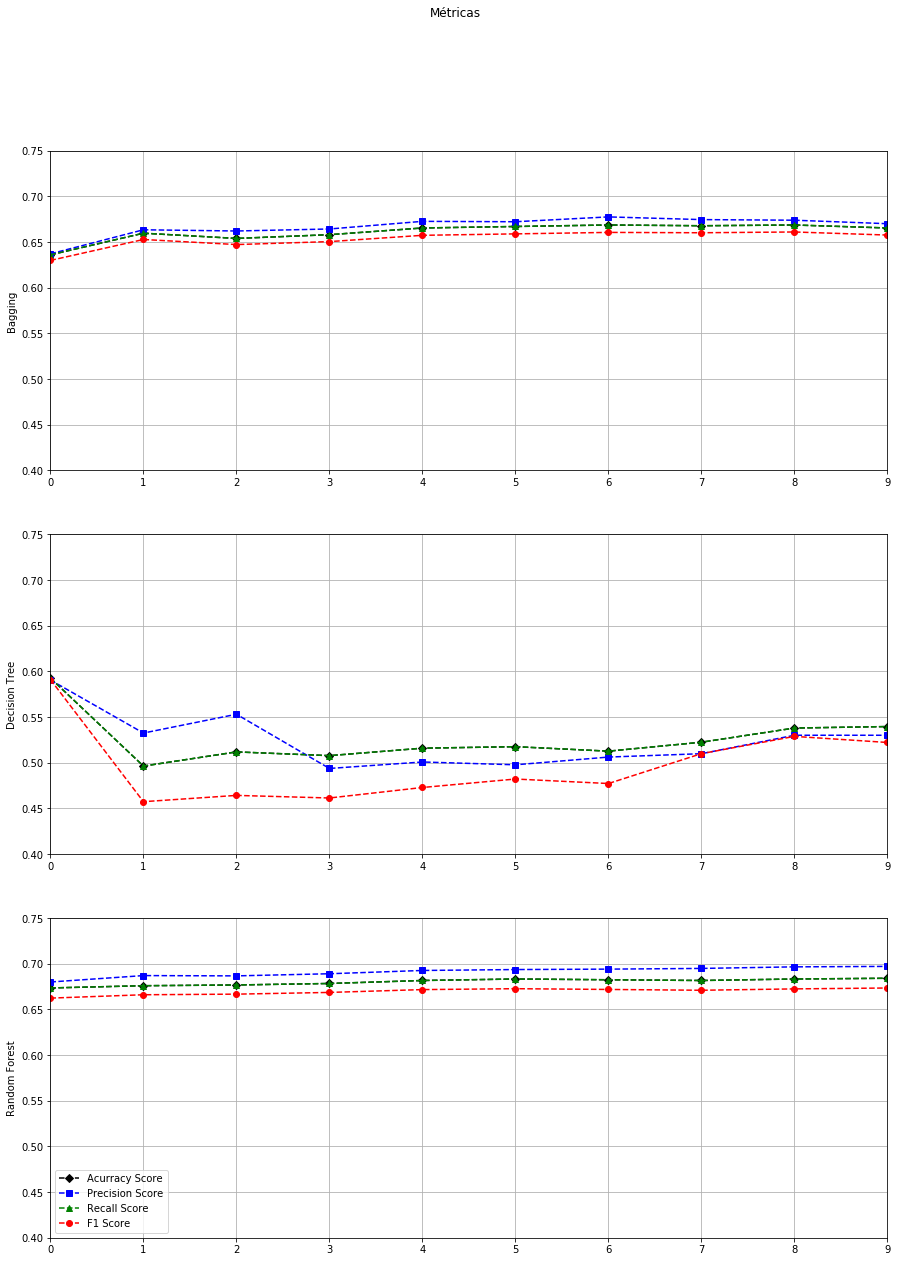

In [189]:

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 20]

for i in range(len(labels)):
    plt.subplot(311+i)
    plt.plot(np.arange(len(metrics[i][0])).tolist(), metrics[i][0], 'kD--', label = "Acurracy Score")
    plt.plot(np.arange(len(metrics[i][0])).tolist(), metrics[i][1], 'bs--', label = "Precision Score")
    plt.plot(np.arange(len(metrics[i][0])).tolist(), metrics[i][2], 'g^--', label = "Recall Score")
    plt.plot(np.arange(len(metrics[i][0])).tolist(), metrics[i][3], 'ro--', label = "F1 Score")
    plt.axis([0, len(k_range)-1, 0.4, 0.75])
    plt.ylabel(labels[i])
    plt.grid("on")
plt.legend()
plt.suptitle("Métricas")
plt.show()


# ------------------------Extra ---------------------------

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':['gini','entropy'],
    'bootstrap': [True],
    'max_depth': [80,90,100,110],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 9,10],
    'n_estimators': [100,200,300,500,800,1000]
}
rfc = RandomForestClassifier()
# cv = n-cross-validation
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, refit = 'TRUE')
grid_search.fit(X_train, y_train)

print('Melhores parametros = \n',grid_search.best_params_)
print('\nMelhor pontuação: \n',grid_search.best_score_)


Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   59.0s


In [ ]:
feature_importantes = pd.DataFrame(grid_search.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importantes)